In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [ ]:
from google.colab import files
files.upload()

Saving test_pFkWwen.csv to test_pFkWwen.csv


{'test_pFkWwen.csv': b'ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season\r\nF00000002,188,1,1,1,0,,0,2\r\nF00000007,410,1,1,1,0,0,0,2\r\nF00000011,626,1,0,1,0,0,0,2\r\nF00000013,731,1,0,1,0,0,0,2\r\nF00000014,789,0,0,1,0,0,0,1\r\nF00000015,851,0,1,1,0,0,0,2\r\nF00000016,851,1,0,1,0,,0,3\r\nF00000019,1056,1,0,1,0,0,0,1\r\nF00000025,1576,1,0,1,0,0,0,2\r\nF00000026,1576,1,0,1,0,0,0,1\r\nF00000027,1576,1,1,1,0,0,0,1\r\nF00000031,1898,0,1,1,0,,0,2\r\nF00000032,1898,1,0,1,0,0,0,2\r\nF00000033,2016,0,0,1,0,0,0,2\r\nF00000034,2015,0,0,1,0,0,0,2\r\nF00000036,2267,1,0,1,0,0,0,1\r\nF00000040,2541,0,0,1,0,0,0,2\r\nF00000041,2541,1,0,1,0,0,0,2\r\nF00000043,2840,0,0,1,0,0,0,2\r\nF00000044,2999,0,0,1,0,0,0,3\r\nF00000046,3164,0,1,1,0,0,0,1\r\nF00000047,3336,0,1,1,0,,0,2\r\nF00000051,150,0,0,3,30,20,0,2\r\nF00000053,150,0,0,3,40,19,0,1\r\nF00000057,168,0,1,3,20,10,0,2\r\nF00000059,168,0,1,3,30,14,0,3\r\nF00000060,168,0,1,

In [ ]:
dftrain=pd.read_csv('train_yaOffsB.csv')
dftest=pd.read_csv('test_pFkWwen.csv')

In [ ]:
dftrain.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,4,4,4,4,4,4,4.0,4,4,4
1,4,4,4,4,4,4,4.0,4,4,4
2,4,4,4,4,4,4,4.0,4,4,4
3,4,4,4,4,4,4,4.0,4,4,4
4,4,4,4,4,4,4,4.0,4,4,4


In [ ]:
dftrain.shape

(88858, 10)

In [ ]:
dftest.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [ ]:
dftrain.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
dftest.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [ ]:
dftrain.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

In [ ]:
dftrain[dftrain['Number_Weeks_Used'].isnull()]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
10,F00000021,1212,1,0,1,0,NaN,0,3,0
17,F00000037,2401,0,1,1,0,NaN,0,1,1
35,F00000076,257,0,0,3,30,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...,...
88786,F00155793,1785,1,0,2,60,NaN,16,2,0
88788,F00155801,1898,1,0,2,15,NaN,3,1,0
88825,F00155882,2542,1,0,2,10,NaN,21,2,0
88833,F00155899,2687,1,0,2,10,NaN,21,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e17bde550>,
      dtype=object)

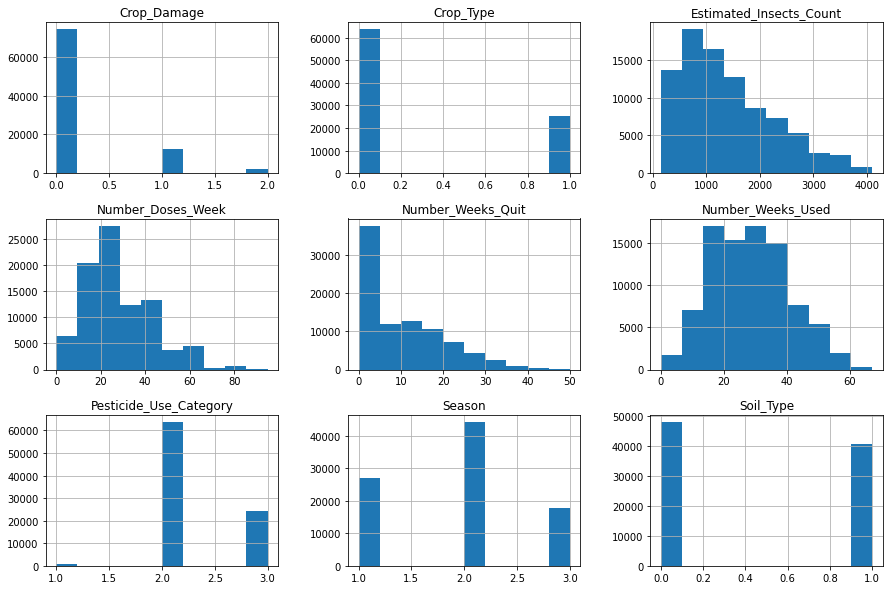

In [ ]:
pd.plotting.hist_frame(dftrain,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e188e5f28>,
      dtype=object)

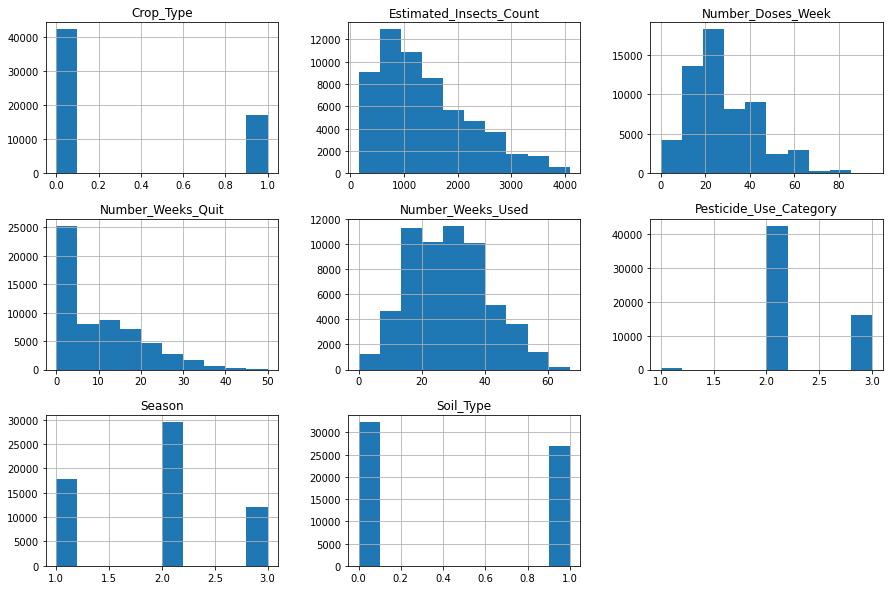

In [ ]:
pd.plotting.hist_frame(dftest,figsize=(15,10))

In [ ]:
dftrain[['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']].tail(160)

,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
88698,5,10.0,1
88699,10,8.0,23
88700,10,9.0,27
88701,10,NaN,27
88702,10,12.0,29
88703,10,15.0,14
88704,10,18.0,16
88705,10,NaN,18
88706,20,15.0,25
88707,20,20.0,9


In [ ]:
dftrain['Number_Weeks_Quit'].value_counts()

0     26437
4      3365
10     2893
5      2831
2      2743
12     2701
15     2668
1      2620
14     2610
6      2584
3      2578
13     2485
7      2418
8      2294
20     2209
16     2108
11     2090
18     2030
17     2018
9      1897
19     1841
21     1436
22     1414
23     1166
25     1109
24     1054
26      894
27      820
28      808
30      751
29      719
31      530
32      505
33      370
34      345
35      301
36      248
37      221
38      162
40      133
39      109
41       86
42       75
43       51
44       38
45       30
46       22
47       21
48       10
50        6
49        4
Name: Number_Weeks_Quit, dtype: int64

In [ ]:
dftrain[dftrain['Number_Doses_Week']==0]=4

In [ ]:
dftrain.isnull().any(axis=0)

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

In [ ]:
dftest.isnull().any(axis=0)

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
dtype: bool

In [ ]:
from sklearn.ensemble import RandomForestRegressor

dftrain_No_NUll = dftrain[pd.isnull(dftrain['Number_Weeks_Used']) == False]
dftrain_NUll = dftrain[pd.isnull(dftrain['Number_Weeks_Used'])]

In [ ]:
dftrain_NUll.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1


In [ ]:

dftest_No_NUll = dftest[pd.isnull(dftest['Number_Weeks_Used']) == False]
dftest_NUll = dftest[pd.isnull(dftest['Number_Weeks_Used'])]

In [ ]:
dftest_NUll.head(20)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
6,F00000016,851,1,0,1,0,NaN,0,3
11,F00000031,1898,0,1,1,0,NaN,0,2
21,F00000047,3336,0,1,1,0,NaN,0,2
39,F00000094,375,0,0,3,30,NaN,0,1
57,F00000138,489,0,0,3,60,NaN,0,3
65,F00000161,531,0,1,3,40,NaN,0,3
79,F00000200,677,0,0,3,10,NaN,0,3
88,F00000220,731,0,1,3,30,NaN,0,2
94,F00000228,790,0,0,3,40,NaN,0,2


In [ ]:
dftest['Number_Doses_Week'].value_counts()

20    15038
40     8449
10     8059
30     6884
15     5532
5      3653
25     3200
60     2928
50     2204
35     1207
45      608
4       571
80      375
70      251
55      179
65       66
90       52
75       37
95       11
85        6
Name: Number_Doses_Week, dtype: int64

In [ ]:
dftest[dftest['Number_Doses_Week']==0]=4

In [ ]:
dftrain.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [ ]:
Ind_var=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
'Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Season']

Target=['Number_Weeks_Used'] 

rfModel = RandomForestRegressor()
rfModel.fit(dftrain_No_NUll[Ind_var], dftrain_No_NUll[Target])
Target_Null=rfModel.predict(X = dftrain_NUll[Ind_var])

In [ ]:
dftrain_NUll['Number_Weeks_Used']=np.round(Target_Null,0).astype(float)

In [ ]:
rfModel = RandomForestRegressor()
rfModel.fit(dftest_No_NUll[Ind_var], dftest_No_NUll[Target])
Test_Null=rfModel.predict(X = dftest_NUll[Ind_var])

In [ ]:
dftest_NUll['Number_Weeks_Used']=np.round(Test_Null,0).astype(float)

In [ ]:
dftrain=dftrain_No_NUll.append(dftrain_NUll)
dftest=dftest_No_NUll.append(dftest_NUll)

In [227]:
selected_feat=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
'Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Number_Weeks_Used','Season']

Target=['Crop_Damage']

X=dftrain[selected_feat].values
y=dftrain[Target].values

In [ ]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
saample={1:0.7,2:0.5}

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter
smk = SMOTETomek(random_state=7806)
X_train_res, y_train_res = smk.fit_sample(X,y)
#print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Resampled dataset shape Counter({2: 73126, 1: 71701, 0: 71647})


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X_train_res)

In [ ]:
y=y_train_res

In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split

In [211]:
X_train,X_test,y_train,y_test=train_test_split(X_train_res, y_train_res, test_size=0.30, random_state=5480)

In [ ]:
import xgboost as xgb
from sklearn import metrics

In [ ]:

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }
view rawhyperopt_space

In [213]:
def hyperparameter_tuning(space):
    clf=xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],colsample_bytree=space['colsample_bytree'])
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,eval_set=evaluation,early_stopping_rounds=5,verbose=False)

    pred = clf.predict(X_test)
    print("classification Report",metrics.classification_report(y_test,pred))
    print("confusion Matrix",metrics.confusion_matrix(y_test,pred))
    print("Accuracy Score",metrics.accuracy_score(y_test,pred))
    accuracy=metrics.accuracy_score(y_test,pred)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [214]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,space=space,algo=tpe.suggest,max_evals=100,trials=trials)
print (best)

classification Report
              precision    recall  f1-score   support

           0       0.79      0.93      0.86     21699
           1       0.67      0.51      0.58     21435
           2       0.71      0.75      0.73     21809

    accuracy                           0.73     64943
   macro avg       0.72      0.73      0.72     64943
weighted avg       0.72      0.73      0.72     64943

confusion Matrix
[[20193  1266   240]
 [ 4044 10946  6445]
 [ 1177  4231 16401]]
Accuracy Score
0.7320265463560353
classification Report
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     21699
           1       0.70      0.57      0.63     21435
           2       0.75      0.78      0.77     21809

    accuracy                           0.76     64943
   macro avg       0.76      0.76      0.75     64943
weighted avg       0.76      0.76      0.75     64943

confusion Matrix
[[20342  1251   106]
 [ 3741 12111  5583]
 [  905  3865 17039]

In [228]:
model_xgb=xgb.XGBClassifier(colsample_bytree= 0.7610416153384245, gamma= 2.953242284371964, learning_rate= 0.1, max_depth= 17, min_child_weight= 1.0, reg_alpha= 10.0, reg_lambda= 0.23928656807013093)
model=model_xgb.fit(X,y)

In [229]:
std_test=StandardScaler()
X_test=dftest[selected_feat].values
#X_test=std.fit_transform(X_test)

In [230]:
predictions=model_xgb.predict(X_test)

In [233]:
sample_df=pd.DataFrame(dftest, columns=['ID'])
sample_df['Crop_Damage']=predictions

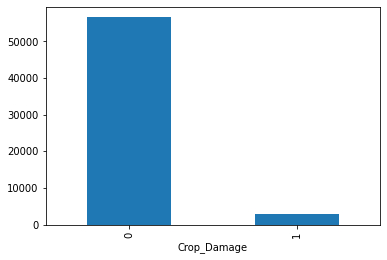

In [234]:
sample_df.groupby('Crop_Damage').size().plot(kind='bar')

In [226]:
sample_df.to_csv('sample_df.csv', index=False)